In [ ]:
def xyz_2_uv(X, P2):
    '''
    Transform camera cooridiante(x,y,z) to image plane(u,v)
    '''
    x,y,z = X
    X_img = np.matmul(P2, np.array([[x], [y], [z], [1]]))
    X_img /= X_img[2]
    u, v = int(X_img[0]), int(X_img[1])
    return (u,v)

def uv_2_xyz(X, P2, y0=1.65):
    P2_3x3 = np.array([P2[0, :3], P2[1, :3], P2[2, :3]])
    P2_inv = np.linalg.inv(P2_3x3)

    alpha = y0/( P2_inv[1,0]*X[0] + P2_inv[1,1]*X[1] + P2_inv[1,2] )
    
    ans = np.matmul(P2_inv, np.array([ [X[0]*alpha], [X[1]*alpha], [alpha]]))
    return (ans[0][0], ans[1][0], ans[2][0])

def get_slope(uv, P2, reso = (375, 1242)):
    MAX_SLOPE = 500

    # Remap uv to (375, 1242)
    uv = (uv[0]*1242/reso[1], uv[1]*375/reso[0])
    
    x, y, z = uv_2_xyz(uv, P2)
    u1, v1 = xyz_2_uv((x, y, z-10), P2)
    u2, v2 = xyz_2_uv((x, y, z+10), P2)
    
    # Avoid ZeroDivision
    if (u2-u1) == 0 : return MAX_SLOPE
    
    slope = (v2 - v1) / (u2 - u1)
    
    if slope > MAX_SLOPE: 
        return MAX_SLOPE
    elif slope < -MAX_SLOPE:
        return -MAX_SLOPE
    else:
        return slope

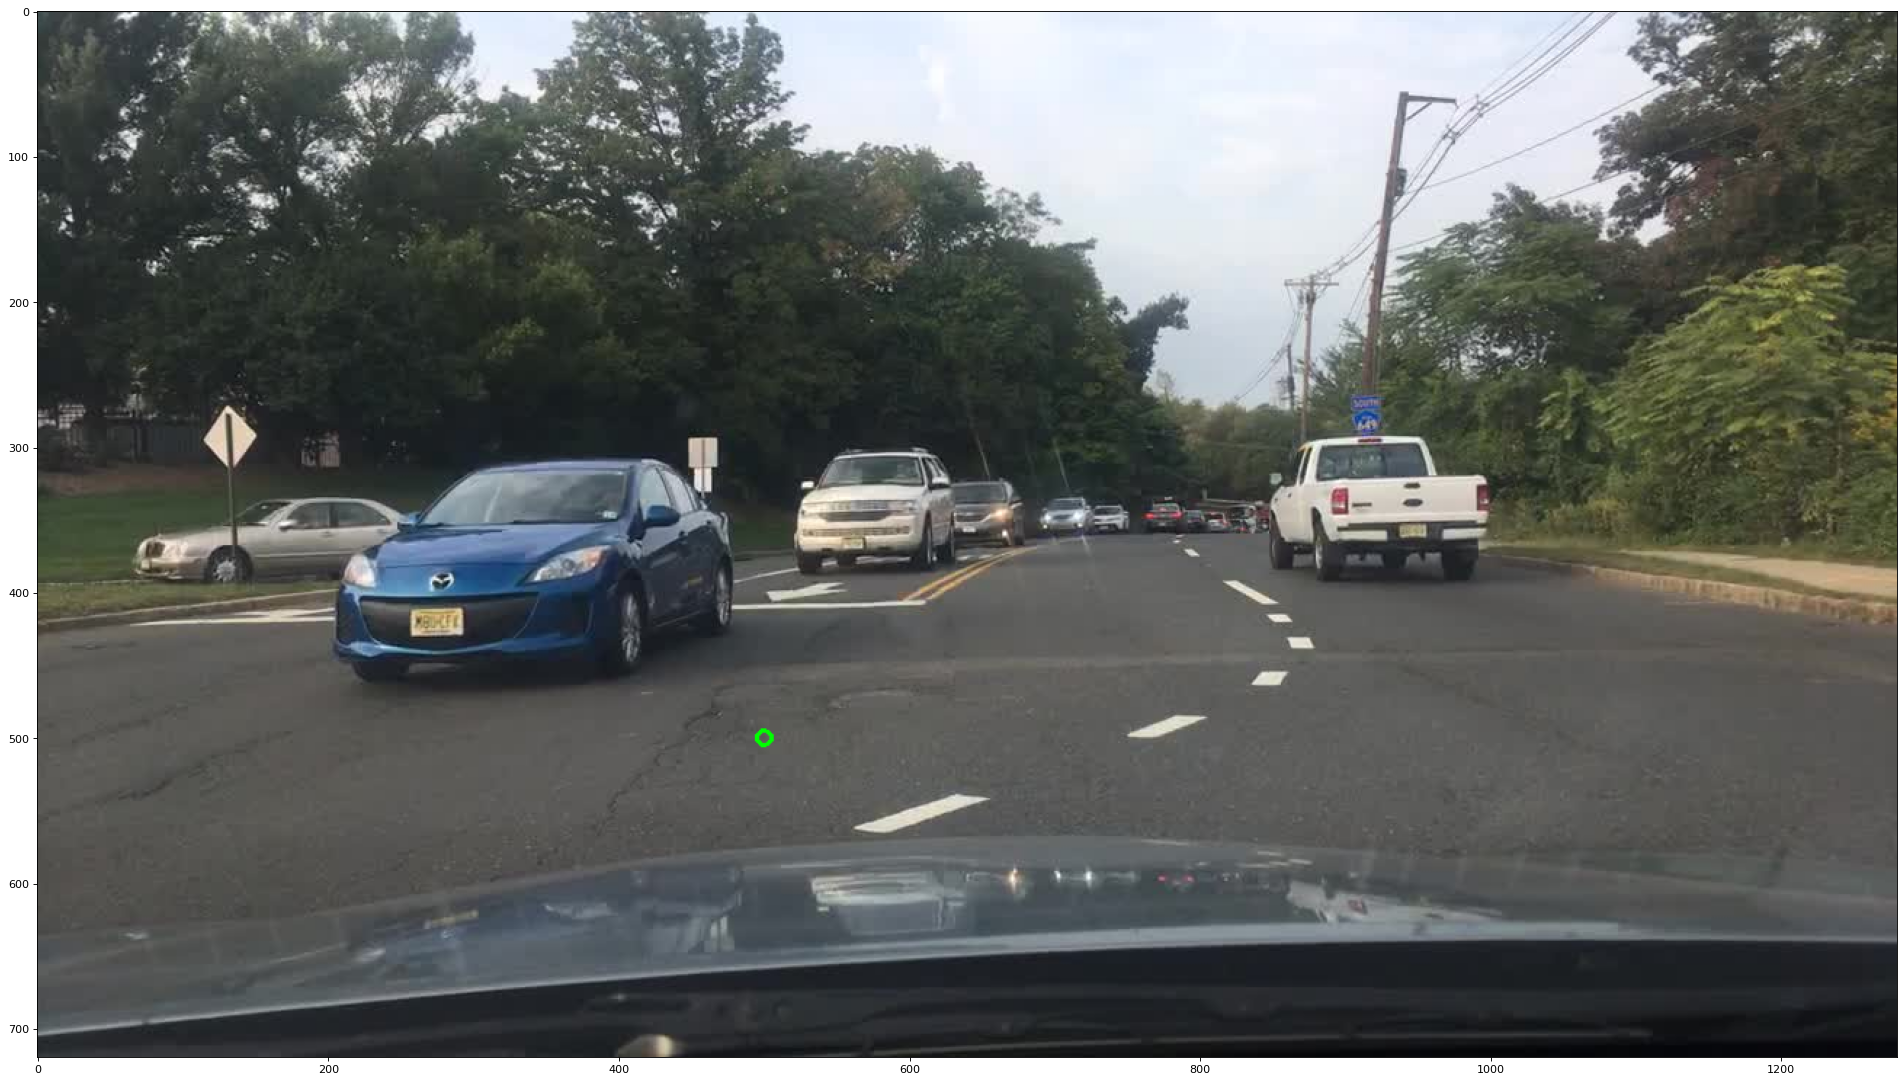

In [8]:
import math
import os
import glob
import numpy as np
import pprint
from collections import namedtuple, defaultdict
import matplotlib.pyplot as plt
import cv2

INPUT_POINT = ()
MIN_WIDTH
CAMERA_ELEVATION = 1.65 # 1.65

img = cv2.imread("1.jpg")

img = cv2.circle(img, (500, 500), 5, (0, 255, 0 ), 2)
img = cv2.line(img, xyz_2_uv((x, CAMERA_ELEVATION, 0), P2), xyz_2_uv((x, CAMERA_ELEVATION, 10000), P2), (0, 0, 255), 1)


# BGR to RGB
img = img[...,::-1].copy()

plt.figure(figsize=(30, 20), dpi=80)
plt.imshow(img)
# [b.axis('off') for a in ax for b in a ]# Delete all axis